# Support Vector Machines (SVM)

## Binary Classification

Given a training data $(\textbf{x}_i, y_i)$ for $i= 1, .., N$, with $\textbf{x}_i\in \mathbb{R}^d$ and $y_i\in\{-1, 1\}$, learn a classifier $f(\textbf{x})$ such that

$$
\color{blue}{
    f(\textbf{x}_i)
    \begin{cases}
    \geq 0 & \quad \text{$y_i$ = 1}\\
    < 0 & \quad \text{$y_i$ = -1}
    \end{cases}
}
$$

i.e. $y_i f(\textbf{x}_i) > 0$ for a correct classification.

Description| Image
---|:---:
Linearly Separable|<img src="https://www.aitude.com/wp-content/uploads/2020/02/SVM2-1.jpg" width="150">
<span style="color:red;">Not</span> Linearly Separable|<img src="https://www.aitude.com/wp-content/uploads/2020/02/SVM3-1-1.jpg" width="150">

**Linear Classifier:**

A linear classifier has a form

$$
f(\textbf{x})=\textbf{w}^T\textbf{x}+b
$$

$\textbf{w}$ is the normal to the line and $b$ is bias. Also $\textbf{w}$ is known as a witght vector.

## Sketch Derivation

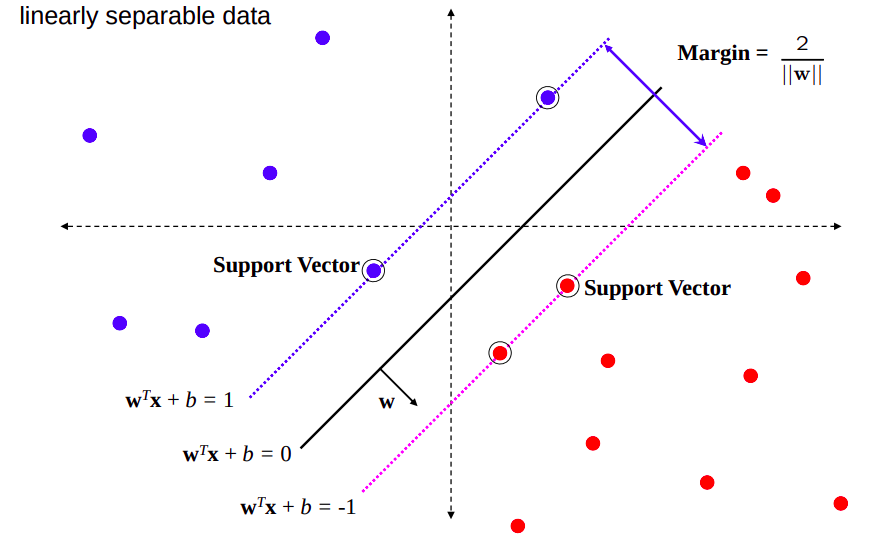

- Since $\textbf{w}^T\textbf{x}+b=0$ and $c(\textbf{w}^T\textbf{x}+b)=0$ defins same plane, we have the freedom to choose the normalization of $\textbf{w}$.
- Choose a normalization such that $\textbf{w}^T\textbf{x}_++b=1$ and $\textbf{w}^T\textbf{x}_-+b=-1$ for the positive and negitive support vectors respectively.

- Then the *margin* is given by

$$
\frac{\textbf{w}}{||\textbf{w}||}\cdot(\textbf{x}_+ - \textbf{x}_-)=\frac{\textbf{w}^T(\textbf{x}_+ - \textbf{x}_-)}{||\textbf{w}||} =  \frac{2}{||\textbf{w}||}
$$

## Optimization - Hard Margin

Learning the SVM can be formulated as an optimization:

$$
max_\textbf{w} \frac{2}{||\textbf{w}|||}~ \text{subject to } \textbf{w}^T\textbf{x}+b
    \begin{cases}
    \geq 1 & if \quad \text{$y_i$ = 1}\\
    \leq -1 & if \quad \text{$y_i$ = -1}
    \end{cases}
\text{for} ~i=1,...,N
$$

Or equivalently

$$
\color{green}{
min_\textbf{w} \frac{||\textbf{w}||^2}{2}~\text{subject to}~ y_i(\textbf{w}^T\textbf{x}+b)\geq 1~\text{for}~i=1,..., N
}
$$

This is a quardatic optimization problem subject to linear constrains and there is a unique minimum.

**Primal Problem:**

$$
\begin{align}
\mathcal{L}(\textbf{w}, b,\alpha)=\frac{||\textbf{w}||^2}{2}- \sum_{n=1}^{N}\alpha_i[y_i(\textbf{w}^T\textbf{x}+b)]
\end{align}
$$

**Dual Problem:**

To find the dual from of (1) we need to first minimize $\mathcal{L}(\textbf{w}, b,\alpha)$ with respect to $\textbf{w}$ and $b$ for fixed $\alpha_i$.

Now,

$$
\begin{align*}
\nabla_{\textbf{w}} \mathcal{L}(\textbf{w}, b,\alpha)=0 & \implies \textbf{w}-\sum_{i=1}^N \alpha_iy_i\textbf{x}_i=0\\
&\implies \textbf{w}=\sum_{i=1}^N \alpha_iy_i\textbf{x}_i
\end{align*}
$$

As for the derivetivr with respect to $b$, we obtain

$$
\begin{align*}
\frac{\partial}{\partial b}\mathcal{L}(\textbf{w}, b,\alpha)=\sum_{i=1}^N \alpha_iy_i=0
\end{align*}
$$

So from (1) we get the Lagrange dual as

$$
\mathcal{L}(\textbf{w}, b,\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^Ny_iy_j\alpha_i\alpha_j\textbf{x}_i^T\textbf{x}_j
$$

Thus the optimization problem becomes,

$$
\color{green}{
max_{\alpha} W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^Ny_iy_j\alpha_i\alpha_j<\textbf{x}_i,\textbf{x}_j>\\
s.t.~\alpha_i\geq0, ~i=1,...,N~\text{and}~\sum_{i=1}^N\alpha_iy_i=0
}
$$

This $W(\alpha)$ is known as <span style="color:red;">Wolfe dual Lagrangian function</span>.

The main advantage of the Wolfe dual problem over the Lagrangian problem is that the objective function $W$ now dependa only on the Lagrange multipliers.

When we solve the Wolfe dual problem, we get a vector $\alpha=[\alpha_1,.., \alpha_N]^T$ and then we compute $\textbf{w}$ and $b$.

Compute $\textbf{w}$:

$$
\textbf{w}=\sum_{i=1}^N \alpha_iy_i\textbf{x}_i
$$

Compute $b$:

$$
\begin{align*}
& \textbf{w}\cdot \textbf{x}_i + b=y_i\\
\implies & b=y_i-\textbf{w}\cdot \textbf{x}_i
\end{align*}
$$

## Hypothesis Function

The SVMs use the same hypothesis function as the perseptron. The class of an example

$$
h(\textbf{x}_i)=sing(\textbf{w}\cdot\textbf{x}_i+b)
$$

When using the dual formulation, it is computed using only the support vectors:

$$
h(\textbf{x}_i)=sing(\sum_{j=1}^N\alpha_jy_j(\textbf{x}_j\cdot\textbf{x}_i)+b)
$$

This formulation of the SVMs is called the <span style="color:red;">hard margin SVM</span>. It cannot work when the data is not linearly separable. Soft margine SVM applied non-linearly separable data.

## Non-Linearly Separable Problrm

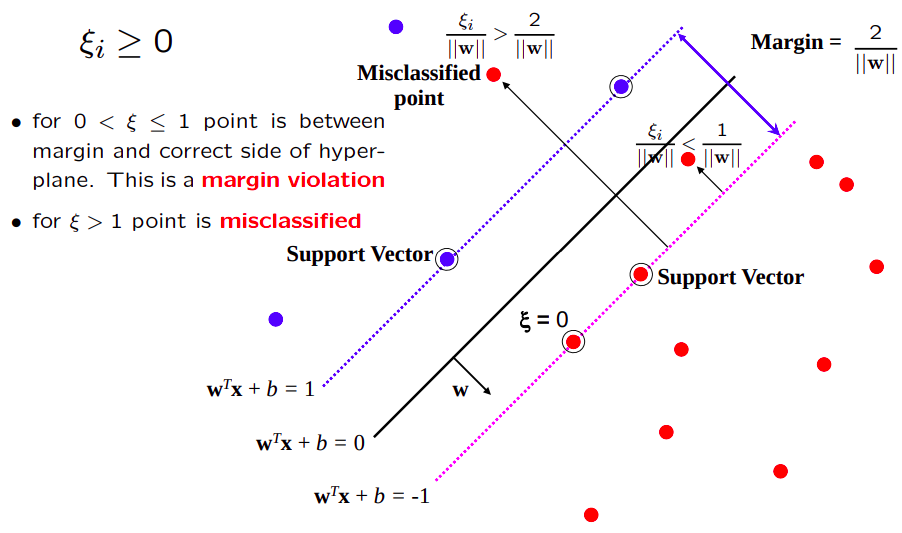

We allow “error” $\xi_i$ in classification, it is based on the output of the discriminant function $\textbf{w}\cdot\textbf{x}_i+b$.

$\xi_i$ approximates the number of misclassified samples.

The new objective function becomes:

$$
\color{green}{
\begin{align*}
&min_{\textbf{w}, \xi_i} \frac{||\textbf{w}||^2}{2}+C\sum_{i=1}^N\xi_i\\
&\text{subject to}~ y_i(\textbf{w}^T\textbf{x}+b)\geq 1-\xi_i~\text{for}~i=1,..., N\\
&\xi_i\geq0~\text{for}~i=1,..., N
\end{align*}}
$$

- Every constraint can be satisfied if $\xi_i$ is sufficiently large.
- $C$ is the *regularization* parameter.
  - small $C$ allows constraints to be easily ignored $\rightarrow$ large margin but allow more misclassification.
  - larg $C$ makes constraints hard to ignore $\rightarrow$ narrow margin.
  - $C=\infty$ enforce all constraints $\rightarrow$ hard margin.
- This is still a quadratic optimization problem and there is a unique minimum. Note, there is only one parameter, $C$.

The Wolfe dual Lagrangian function is

$$
\color{green}{
max_{\alpha} W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^Ny_iy_j\alpha_i\alpha_j<\textbf{x}_i,\textbf{x}_j>\\
s.t.~C\geq\alpha_i\geq0, ~i=1,...,N~\text{and}~\sum_{i=1}^N\alpha_iy_i=0}
$$

## Optimization - Soft Margin

$$
min_{\textbf{w}, \xi_i} \frac{||\textbf{w}||^2}{2}+C\sum_{i=1}^N\xi_i~~~\text{subject to}~ y_i(\textbf{w}^T\textbf{x}+b)\geq 1-\xi_i~\text{for}~i=1,..., N
$$

The constraint $~~y_i(\textbf{w}^T\textbf{x}+b)\geq1-\xi_i$, can be written more concisely as

$$y_if(\textbf{x}_i)\geq1-\xi_i$$

Which, together with $\xi_i\geq0$, is equivqlent to,

$$
\xi_i=\max(0, 1-y_if(\textbf{x}_i))
$$

Hence the learning problem is equivqlent to the unconstrained optimization problem over $\textbf{w}$

$$
\min_{\textbf{w}\in\mathbb{R}^d}\underbrace{||\textbf{w}||^2}_{\text{regularization}} + C\sum_i^N\underbrace{\max(0, 1-y_if(\textbf{x}_i))}_{\text{loss function}}
$$

Points are in three categories:

- $y_if(\textbf{x}_i)>1$. Point is outside margin. No contribution to loss.
- $y_if(\textbf{x}_i)=1$. Point is on margin. No contribution to loss.
- $y_if(\textbf{x}_i)<1$. Point violates margin constraint. Contribution to loss.

---

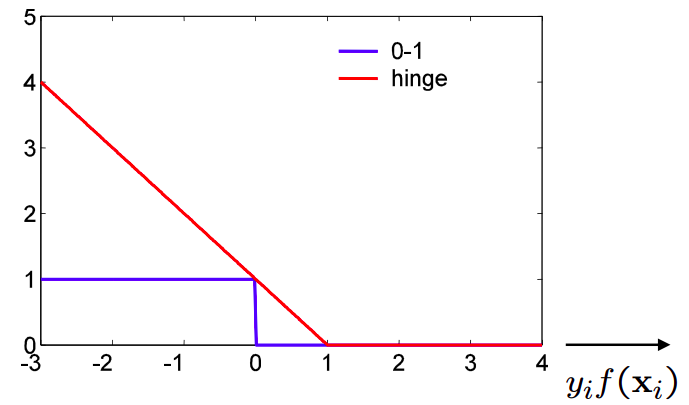

Loss function

$$\mathcal{l}(y, f(\textbf{x}))=\max(0, 1-yf(\textbf{x}))$$

is known as <span style="color:red;">Hinge loss</span>.

---
**Gradient descent algorithm for SVM:**

To minimize cost function

$$
\mathcal{C}(\textbf{w})=\frac{1}{2}||\textbf{w}||^2+C\sum_i^N \max(0, 1-y_if(\textbf{x}_i))
$$

use the iterative update

$$
\textbf{w}_{t+1}\leftarrow \textbf{w}_t-\eta_t\nabla_{\textbf{w}}\mathcal{C}(\textbf{w})
$$

where $\eta$ is the learning rate.

First, write optimization problem as an average

$$
\begin{align*}
\mathcal{C}(\textbf{w})& =\frac{\lambda}{2}||\textbf{w}||^2+\frac{1}{N}\sum_i^N \max(0, 1-y_if(\textbf{x}_i))\\
& = \frac{1}{N}\sum_i^N \left(\frac{\lambda}{2}||\textbf{w}||^2+\max(0, 1-y_if(\textbf{x}_i))\right)
\end{align*}
$$

with $\lambda=2/NC$ up to an overall scale of the problem.

Becouse hinge is not differentiable, a sub-gradient is computed.

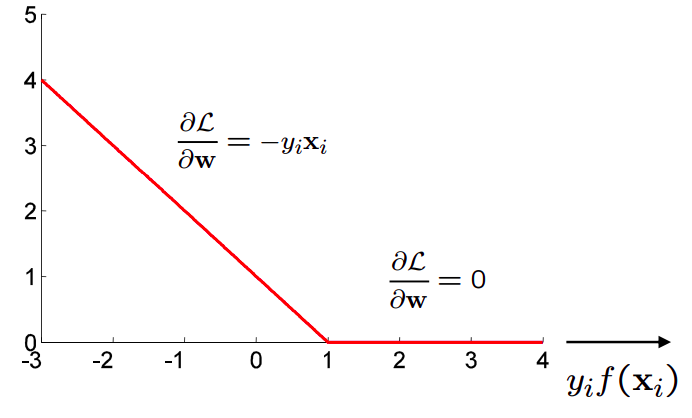

$$
\mathcal{C}(\textbf{w})= \frac{1}{N}\sum_i^N \left(\frac{\lambda}{2}||\textbf{w}||^2+\mathcal{L}(\textbf{x}_i, y_i;\textbf{w})\right)
$$

The iterative update is

$$
\begin{align*}
\textbf{w}_{t+1}& \leftarrow \textbf{w}_t-\eta_t\nabla_{\textbf{w}}\mathcal{C}(\textbf{w}_t)\\
& \leftarrow \textbf{w}_t-\eta_t\frac{1}{N}\sum_i^N\left(\lambda\textbf{w}_t+\nabla_{\textbf{w}}\mathcal{L}(\textbf{x}_i, y_i;\textbf{w}_t)\right)
\end{align*}
$$

Then each iteration $t$ involves cycling through the training data with the update:

$$
\begin{align*}
\textbf{w}_{t+1}& \leftarrow \textbf{w}_t-\eta_t(\lambda\textbf{w}_t-y_i\textbf{x}_i) ~~~~~~~if~~y_if(\textbf{x}_i)<1\\
& \leftarrow \textbf{w}_t-\eta_t\lambda\textbf{w}_t ~~~~~~~~~~~~~~~~~~~~~~otherwise
\end{align*}
$$

## SVM in Transformed Feature Space


**How to handle data that is not linearly separable?**

General idea: the original input space $\textbf{x}$ can be mapped to some higher-dimensional feature space $\phi(\textbf{x})$ where the training set is separable. Where

$$
\phi:\mathbb{R}^d\rightarrow\mathbb{R}^D, ~~D>d
$$

If data are mapped into higher a space of sufficiently high dimension,
then they will in general be linearly separable.
$N$ data points are in general separable in a space of $N-1$ dimensions or more.

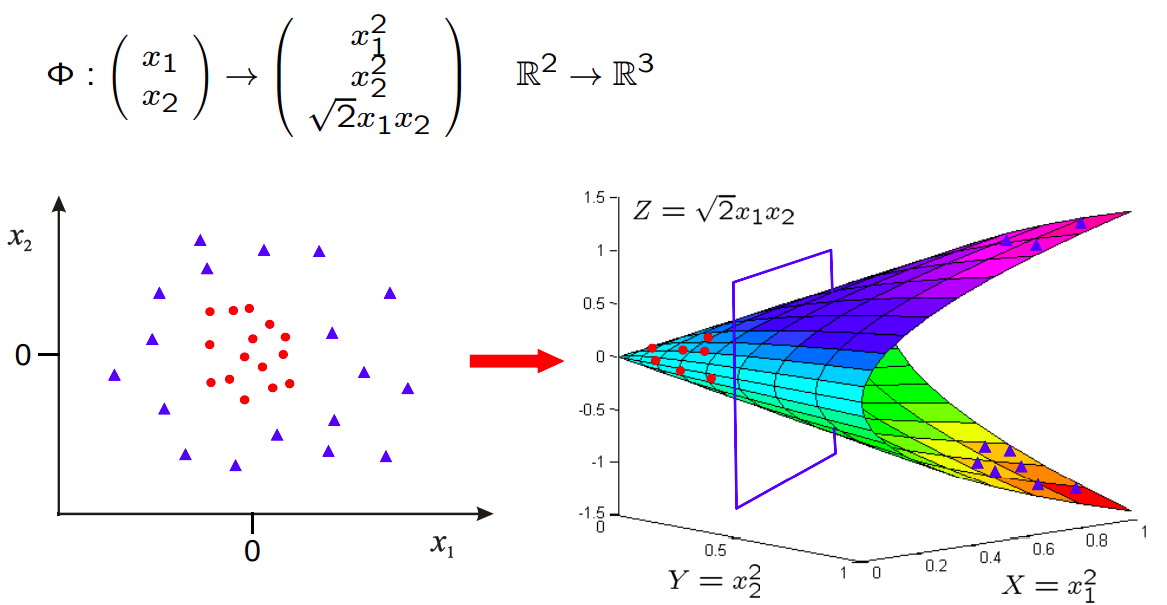

**Kernel Trick**

- Classifier can be learn and applied without explicitly computing $\phi(\textbf{x})$.
- All that is required is the kernel $K(\textbf{x}, \textbf{z})=\phi(\textbf{x})^T\phi(\textbf{z})$.
- Complexity of learning depends on $N$ (typically it is $O(N^3)$) not on $D$.

With Kernel function the Wolfe dual Lagrangian function is

$$
\color{green}{
\begin{align*}
&max_{\alpha} W(\alpha)=\sum_{i=1}^N\alpha_i-\frac{1}{2}\sum_{i=1}^Ny_iy_j\alpha_i\alpha_jK(\textbf{x}_i,\textbf{x}_j)\\
&s.t.~C\geq\alpha_i\geq0, ~i=1,...,N~\text{and}~\sum_{i=1}^N\alpha_iy_i=0
\end{align*}}
$$

<span style="color:pink;">**Popular kernel functions:**</span>

- Linear: $\mathcal{K}(\textbf{w}, \textbf{x})= \textbf{w}^T\textbf{x}+b$
- Polynomial: $\mathcal{K}(\textbf{w}, \textbf{x})= (\gamma\textbf{w}^T\textbf{x}+b)^N$, $~\gamma$ is kernel coefficient
- RBF: $\mathcal{K}(\textbf{w}, \textbf{x})= \exp(-\gamma||\textbf{w}-\textbf{x}||^2)$, $~\gamma$ is kernel coefficient
- Sigmoid: $\mathcal{K}(\textbf{w}, \textbf{x})= \tanh(\gamma \textbf{w}^T\textbf{x}+r)$, $~\gamma$ is kernel coefficient and $r$ is the bias term (sklearn `coef0`) that shifts the data up or down

The kernel coefficient $\gamma$ (sklearn `gamma`) controls the influence of each individual training sample on the decision boundary.
